In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Exploratory Data Analysis

In [30]:
df_daily = pd.read_csv('eMAR daily consumption.csv')
display(df_daily.head())
df_house = pd.read_excel("eMARC household survey summary.xlsx")
display(df_house.head())

,Region,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh)
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010


,HHID,Region,Rooms,No. of People,Area in Sqft,Inverter,Lights,Ceiling Fans,Air Coolers,Air-Conditioners,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave
0,H001,Pune city,3.0,3,625.0,0.0,19,3,0,0.0,1,1,0,1,1,1,1
1,H002,Pune city,5.0,4,1100.0,0.0,14,5,0,3.0,1,1,1,1,1,1,1
2,H003,Pune city,5.0,2,1000.0,0.0,16,6,0,0.0,1,1,3,1,1,1,1
3,H004,Pune city,3.0,7,550.0,0.0,10,2,0,0.0,1,1,1,1,1,1,1
4,H005,Pune city,4.0,5,NaN,0.0,4,3,0,1.0,1,0,0,0,0,1,1


In [31]:
print("Exploring df_daily:")
display(df_daily.info())
print("\nExploring df_house:")
display(df_house.info())

Exploring df_daily:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111280 entries, 0 to 111279
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Region                   111280 non-null  object 
 1   Household type           111280 non-null  object 
 2   household_id             111280 non-null  object 
 3   Deployment type          111280 non-null  object 
 4   deployment_id            111280 non-null  object 
 5   Date                     111280 non-null  object 
 6   Daily consumption (kWh)  111280 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.9+ MB


None


Exploring df_house:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              138 non-null    object 
 1   Region            138 non-null    object 
 2   Rooms             138 non-null    float64
 3   No. of People     138 non-null    int64  
 4   Area in Sqft      115 non-null    float64
 5   Inverter          132 non-null    float64
 6   Lights            138 non-null    int64  
 7   Ceiling Fans      138 non-null    int64  
 8   Air Coolers       138 non-null    int64  
 9   Air-Conditioners  137 non-null    float64
 10  Fridge            138 non-null    int64  
 11  TV                138 non-null    int64  
 12  Water heaters     138 non-null    int64  
 13  Washing Machine   138 non-null    int64  
 14  Mixer             138 non-null    int64  
 15  Iron              138 non-null    int64  
 16  Micro-wave        138 n

None

## Filling in missing values

In [32]:
df_house['Area in Sqft'] = df_house.groupby(['Region'])['Area in Sqft'].transform(lambda x: x.fillna(x.median()))
display(df_house.info())
house = df_house[df_house['Air-Conditioners'].isna()]['HHID']
print(house)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              138 non-null    object 
 1   Region            138 non-null    object 
 2   Rooms             138 non-null    float64
 3   No. of People     138 non-null    int64  
 4   Area in Sqft      138 non-null    float64
 5   Inverter          132 non-null    float64
 6   Lights            138 non-null    int64  
 7   Ceiling Fans      138 non-null    int64  
 8   Air Coolers       138 non-null    int64  
 9   Air-Conditioners  137 non-null    float64
 10  Fridge            138 non-null    int64  
 11  TV                138 non-null    int64  
 12  Water heaters     138 non-null    int64  
 13  Washing Machine   138 non-null    int64  
 14  Mixer             138 non-null    int64  
 15  Iron              138 non-null    int64  
 16  Micro-wave        138 non-null    int64  
dt

None

106    H113
Name: HHID, dtype: object


In [33]:
household_h113 = df_daily[df_daily['household_id'] == 'H113']
household_type = household_h113['Household type'].unique()
if household_type.size > 0:
    print(f"The Household type for H113 is: {household_type[0]}")
else:
    print("Household ID H113 not found in the dataframe.")

Household ID H113 not found in the dataframe.


In [34]:
house_ids = df_house['HHID'].unique().tolist()
daily_ids = df_daily['household_id'].unique().tolist()
print(set(house_ids)-set(daily_ids))
print(set(daily_ids)-set(house_ids))

{'H102', 'H051', 'H035', 'H095', 'H056', 'H054', 'H064', 'H113', 'H039', 'H049', 'H131', 'H116', 'H055'}
{'H037', 'H048', 'H145', 'H110', 'H061', 'H109'}


In [35]:
house_ids = set(df_house['HHID'])
daily_ids = set(df_daily['household_id'])

common_ids = list(house_ids.intersection(daily_ids))

print(f"Found {len(common_ids)} common IDs: {common_ids}\n")

df_house_filtered = df_house[df_house['HHID'].isin(common_ids)]
df_daily_filtered = df_daily[df_daily['household_id'].isin(common_ids)]

print("--- Before Filtering ---")
print(f"df_house had {len(df_house)} rows with IDs: {df_house['HHID'].tolist()}")
print(f"df_daily had {len(df_daily)} rows with IDs: {df_daily['household_id'].tolist()}")

print("\n--- After Filtering ---")
print(f"df_house_filtered now has {len(df_house_filtered)} rows with IDs: {df_house_filtered['HHID'].tolist()}")
print(f"df_daily_filtered now has {len(df_daily_filtered)} rows with IDs: {df_daily_filtered['household_id'].tolist()}")

Found 122 common IDs: ['H123', 'H084', 'H073', 'H028', 'H079', 'H107', 'H066', 'H014', 'H126', 'H128', 'H023', 'H077', 'H031', 'H078', 'H058', 'H060', 'H015', 'H017', 'H081', 'H053', 'H007', 'H117', 'H038', 'H029', 'H140', 'H091', 'H070', 'H089', 'H036', 'H022', 'H093', 'H096', 'H090', 'H135', 'H050', 'H075', 'H082', 'H008', 'H133', 'H005', 'H042', 'H088', 'H087', 'H019', 'H024', 'H098', 'H001', 'H137', 'H003', 'H129', 'H142', 'H057', 'H072', 'H013', 'H025', 'H059', 'H114', 'H043', 'H041', 'H065', 'H080', 'H130', 'H074', 'H004', 'H018', 'H006', 'H103', 'H101', 'H111', 'H026', 'H139', 'H121', 'H047', 'H134', 'H076', 'H127', 'H012', 'H115', 'H085', 'H122', 'H083', 'H034', 'H063', 'H027', 'H021', 'H071', 'H119', 'H143', 'H010', 'H016', 'H092', 'H118', 'H044', 'H112', 'H136', 'H138', 'H120', 'H125', 'H062', 'H086', 'H094', 'H020', 'H141', 'H105', 'H100', 'H067', 'H132', 'H002', 'H046', 'H032', 'H030', 'H099', 'H069', 'H097', 'H068', 'H124', 'H144', 'H009', 'H040', 'H033', 'H052', 'H011']



In [36]:
df_house_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              125 non-null    object 
 1   Region            125 non-null    object 
 2   Rooms             125 non-null    float64
 3   No. of People     125 non-null    int64  
 4   Area in Sqft      125 non-null    float64
 5   Inverter          120 non-null    float64
 6   Lights            125 non-null    int64  
 7   Ceiling Fans      125 non-null    int64  
 8   Air Coolers       125 non-null    int64  
 9   Air-Conditioners  125 non-null    float64
 10  Fridge            125 non-null    int64  
 11  TV                125 non-null    int64  
 12  Water heaters     125 non-null    int64  
 13  Washing Machine   125 non-null    int64  
 14  Mixer             125 non-null    int64  
 15  Iron              125 non-null    int64  
 16  Micro-wave        125 non-null    int64  
dtypes:

In [37]:
df_house_filtered['Inverter'] = df_house_filtered['Inverter'].transform(lambda x: x.fillna(x.mode()[0]))
df_house_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              125 non-null    object 
 1   Region            125 non-null    object 
 2   Rooms             125 non-null    float64
 3   No. of People     125 non-null    int64  
 4   Area in Sqft      125 non-null    float64
 5   Inverter          125 non-null    float64
 6   Lights            125 non-null    int64  
 7   Ceiling Fans      125 non-null    int64  
 8   Air Coolers       125 non-null    int64  
 9   Air-Conditioners  125 non-null    float64
 10  Fridge            125 non-null    int64  
 11  TV                125 non-null    int64  
 12  Water heaters     125 non-null    int64  
 13  Washing Machine   125 non-null    int64  
 14  Mixer             125 non-null    int64  
 15  Iron              125 non-null    int64  
 16  Micro-wave        125 non-null    int64  
dtypes:

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\3568678502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_filtered['Inverter'] = df_house_filtered['Inverter'].transform(lambda x: x.fillna(x.mode()[0]))


## Checking the distributions of different features

In [38]:
print(df_house_filtered.columns)
print(df_daily_filtered.columns)

Index(['HHID', 'Region', 'Rooms', 'No. of People', 'Area in Sqft', 'Inverter',
       'Lights', 'Ceiling Fans', 'Air Coolers', 'Air-Conditioners', 'Fridge',
       'TV', 'Water heaters', 'Washing Machine', 'Mixer', 'Iron',
       'Micro-wave'],
      dtype='object')
Index(['Region', 'Household type', 'household_id', 'Deployment type',
       'deployment_id', 'Date', 'Daily consumption (kWh)'],
      dtype='object')


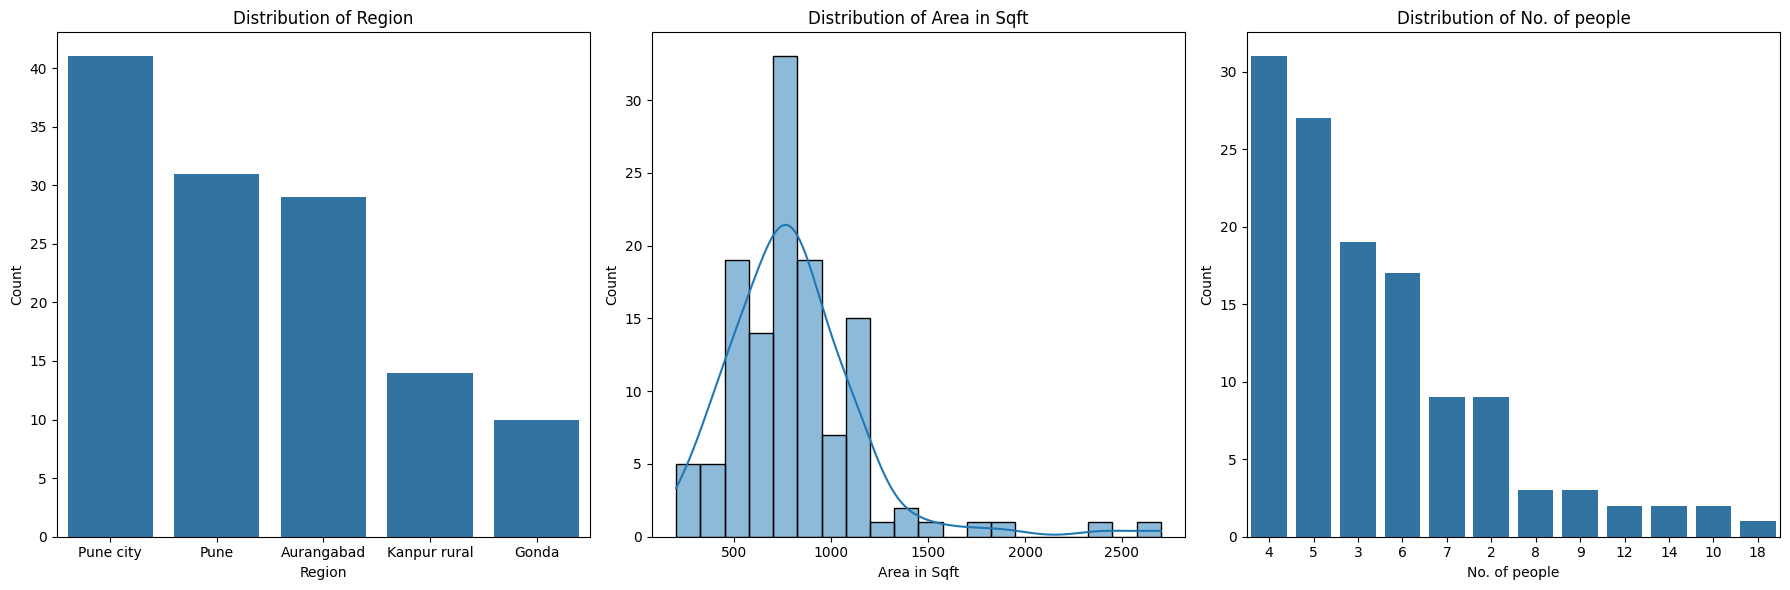

In [39]:
#plot distributions of  Region, Area and No. of people in df_house_filtered and plot them side by side
plt.figure(figsize=(18,6))  
plt.subplot(1, 3, 1)
sns.countplot(data=df_house_filtered, x='Region', order=df_house_filtered['Region'].value_counts().index)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.histplot(data=df_house_filtered, x='Area in Sqft', bins=20, kde=True)
plt.title('Distribution of Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.countplot(data=df_house_filtered, x='No. of People', order=df_house_filtered['No. of People'].value_counts().index)
plt.title('Distribution of No. of people')
plt.xlabel('No. of people')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

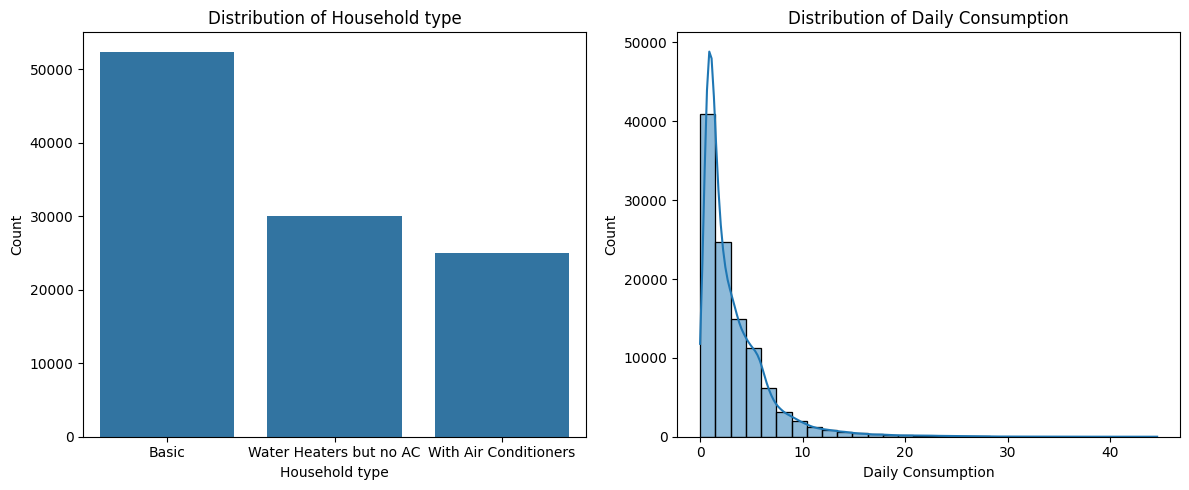

In [40]:
#plot distributions of  Household type in df_daily_filtered : Household type, and continuous distribution of the daily consumption in plots side by side
plt.figure(figsize=(12,5))  
plt.subplot(1, 2, 1)    
sns.countplot(data=df_daily_filtered, x='Household type', order=df_daily_filtered['Household type'].value_counts().index)
plt.title('Distribution of Household type')
plt.xlabel('Household type')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.histplot(data=df_daily_filtered, x='Daily consumption (kWh)', bins=30, kde=True)
plt.title('Distribution of Daily Consumption')
plt.xlabel('Daily Consumption')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

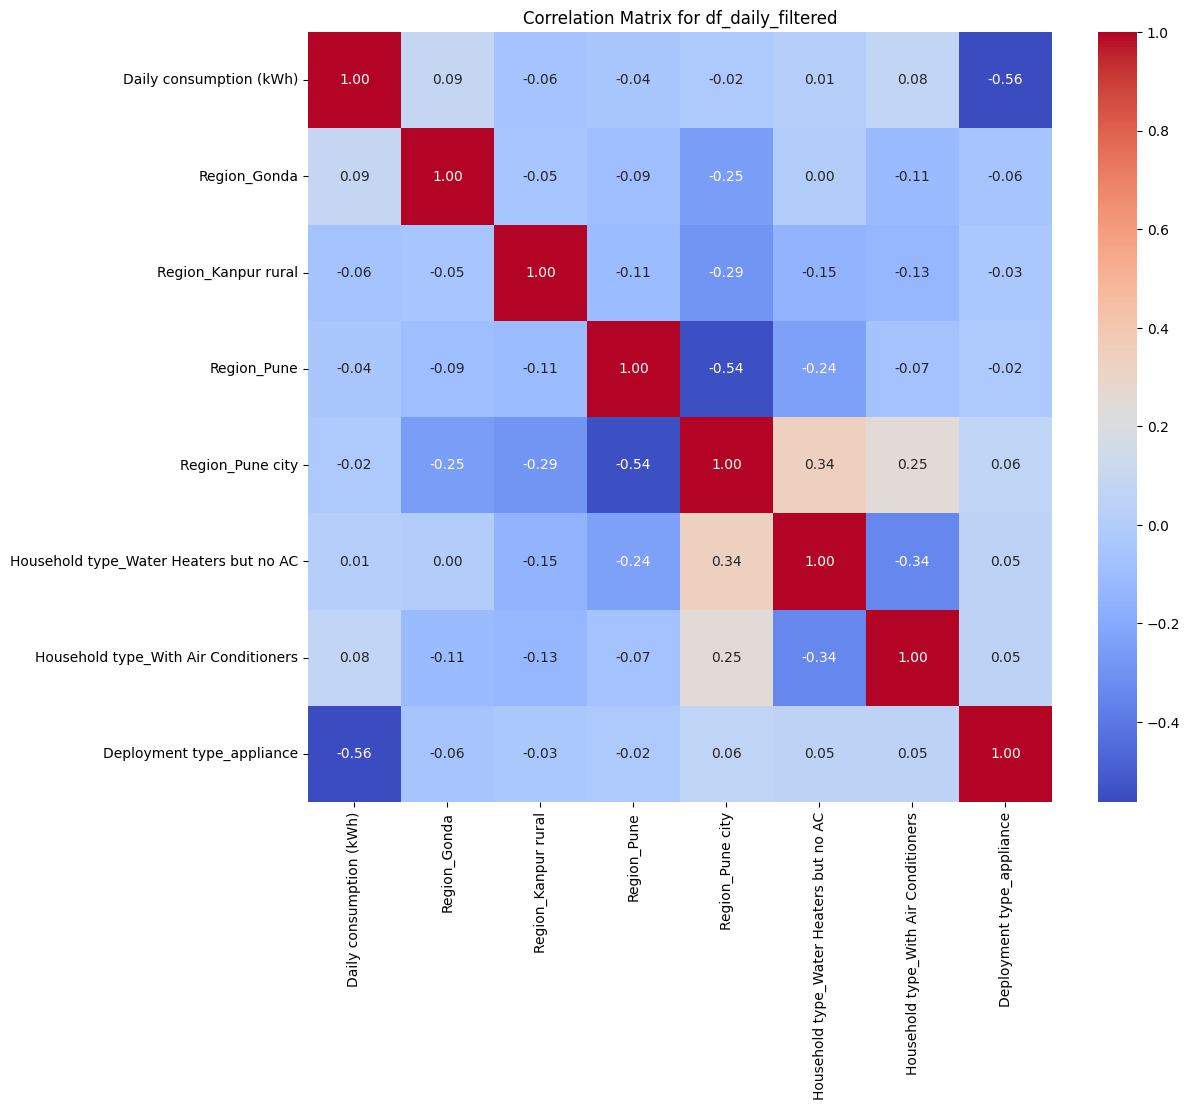

In [41]:
#check correlation between all the numerical featues or use one-hot encoding for categorical features for df_daily_filtered, remove the date column while doing this anaylisys
df_daily_filtered_encoded = pd.get_dummies(df_daily_filtered.drop(columns=['Date','household_id','deployment_id']), drop_first=True)
correlation_matrix = df_daily_filtered_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for df_daily_filtered')
plt.show()


lol no heavy correlation rly


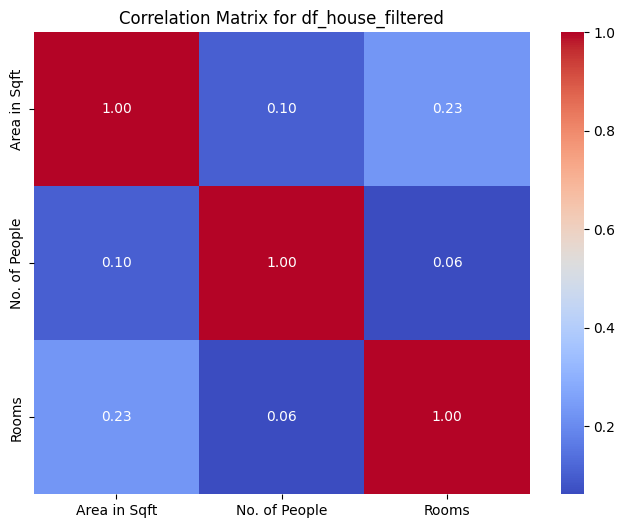

In [42]:
#check correlation between Area in Sqft, No. of People, and No. of Rooms in df_house_filtered
plt.figure(figsize=(8, 6))
correlation_matrix = df_house_filtered[['Area in Sqft', 'No. of People', 'Rooms']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for df_house_filtered')
plt.show()
                                        

ntg again lollllllllllllllllllllllllllllllllllllllllllllll

# Feature Engineering

In [43]:
#make a new dataframe which has alll the columns from both using the house ID, note that one df has repeatig house IDs as it is daily data
df_merged = pd.merge(df_daily_filtered, df_house_filtered, left_on='household_id', right_on='HHID', how='inner')
df_merged.head()                     

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Ceiling Fans,Air Coolers,Air-Conditioners,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1


In [44]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109480 entries, 0 to 109479
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Region_x                 109480 non-null  object 
 1   Household type           109480 non-null  object 
 2   household_id             109480 non-null  object 
 3   Deployment type          109480 non-null  object 
 4   deployment_id            109480 non-null  object 
 5   Date                     109480 non-null  object 
 6   Daily consumption (kWh)  109480 non-null  float64
 7   HHID                     109480 non-null  object 
 8   Region_y                 109480 non-null  object 
 9   Rooms                    109480 non-null  float64
 10  No. of People            109480 non-null  int64  
 11  Area in Sqft             109480 non-null  float64
 12  Inverter                 109480 non-null  float64
 13  Lights                   109480 non-null  int64  
 14  Ceil

In [45]:
#make new columns called EUI, area per occupant and per-capita EUI
# EUI = (Total Energy Consumption in kWh) / (Area in Sqft)
# Per-Capita EUI = EUI / (No. of People)
df_merged['EUI'] = df_merged['Daily consumption (kWh)'] / df_merged['Area in Sqft']
df_merged['Per-Capita EUI'] = df_merged['EUI'] / df_merged['No. of People']
df_merged['Area per Occupant'] = df_merged['Area in Sqft'] / df_merged['No. of People']
df_merged.head()

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave,EUI,Per-Capita EUI,Area per Occupant
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000945,0.000236,275.0
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000846,0.000211,275.0
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000964,0.000241,275.0
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.001155,0.000289,275.0
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000918,0.000230,275.0


In [46]:
# we need to calculate Consumption Volatility (standard deviation of daily use), Seasonal Ratio (Summer vs. Winter), and Weekend-Weekday Ratio.
#Consumption Volatility (standard deviation of daily use), Seasonal Ratio (Summer vs. Winter), and Weekend-Weekday Ratio.
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Day of Week'] = df_merged['Date'].dt.dayofweek
df_merged['Month'] = df_merged['Date'].dt.month
def calculate_metrics(group):
    consumption_volatility = group['Daily consumption (kWh)'].std()
    summer_consumption = group[group['Month'].isin([6, 7, 8])]['Daily consumption (kWh)'].mean()
    winter_consumption = group[group['Month'].isin([12, 1, 2])]['Daily consumption (kWh)'].mean()
    seasonal_ratio = summer_consumption / winter_consumption if winter_consumption != 0 else np.nan
    weekend_consumption = group[group['Day of Week'].isin([5, 6])]['Daily consumption (kWh)'].mean()
    weekday_consumption = group[~group['Day of Week'].isin([5, 6])]['Daily consumption (kWh)'].mean()
    weekend_weekday_ratio = weekend_consumption / weekday_consumption if weekday_consumption != 0 else np.nan
    return pd.Series({
        'Consumption Volatility': consumption_volatility,
        'Seasonal Ratio': seasonal_ratio,
        'Weekend-Weekday Ratio': weekend_weekday_ratio
    })
metrics_df = df_merged.groupby('household_id').apply(calculate_metrics).reset_index()
metrics_df.head()

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\1561561315.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_df = df_merged.groupby('household_id').apply(calculate_metrics).reset_index()


,household_id,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio
0,H001,1.063080,1.462538,1.052487
1,H002,6.680022,1.220435,1.017973
2,H003,1.331445,1.296816,1.068126
3,H004,5.036270,0.909991,0.939793
4,H005,2.623689,1.334958,1.026518


In [47]:
problematic_households = metrics_df[metrics_df.isnull().any(axis=1)]
print(problematic_households)

   household_id  Consumption Volatility  Seasonal Ratio  Weekend-Weekday Ratio
43         H050                0.289108             NaN                0.99236
89         H105                     NaN             NaN                    NaN


we drop these two too :(

In [48]:
#drop these rows from metrics_df
metrics_df = metrics_df.dropna()
df_merged = pd.merge(df_merged, metrics_df, on='household_id', how='inner')
df_merged.head()

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Iron,Micro-wave,EUI,Per-Capita EUI,Area per Occupant,Day of Week,Month,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio
0,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-22,1.039917,H002,Pune city,5.0,...,1,1,0.000945,0.000236,275.0,6,12,6.680022,1.220435,1.017973
1,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-23,0.930054,H002,Pune city,5.0,...,1,1,0.000846,0.000211,275.0,0,12,6.680022,1.220435,1.017973
2,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-24,1.059936,H002,Pune city,5.0,...,1,1,0.000964,0.000241,275.0,1,12,6.680022,1.220435,1.017973
3,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-25,1.270020,H002,Pune city,5.0,...,1,1,0.001155,0.000289,275.0,2,12,6.680022,1.220435,1.017973
4,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-26,1.010010,H002,Pune city,5.0,...,1,1,0.000918,0.000230,275.0,3,12,6.680022,1.220435,1.017973


In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109241 entries, 0 to 109240
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Region_x                 109241 non-null  object        
 1   Household type           109241 non-null  object        
 2   household_id             109241 non-null  object        
 3   Deployment type          109241 non-null  object        
 4   deployment_id            109241 non-null  object        
 5   Date                     109241 non-null  datetime64[ns]
 6   Daily consumption (kWh)  109241 non-null  float64       
 7   HHID                     109241 non-null  object        
 8   Region_y                 109241 non-null  object        
 9   Rooms                    109241 non-null  float64       
 10  No. of People            109241 non-null  int64         
 11  Area in Sqft             109241 non-null  float64       
 12  Inverter        

# Clustering

For n_clusters = 2, the average silhouette_score is : 0.1802551568830108
For n_clusters = 3, the average silhouette_score is : 0.191579420905844
For n_clusters = 4, the average silhouette_score is : 0.19946470736143185
For n_clusters = 5, the average silhouette_score is : 0.2172615750644347
For n_clusters = 6, the average silhouette_score is : 0.17492074092702067
For n_clusters = 7, the average silhouette_score is : 0.18906494956975844
For n_clusters = 8, the average silhouette_score is : 0.19338413491769788
For n_clusters = 9, the average silhouette_score is : 0.1992475213770807
For n_clusters = 10, the average silhouette_score is : 0.20090264152841425


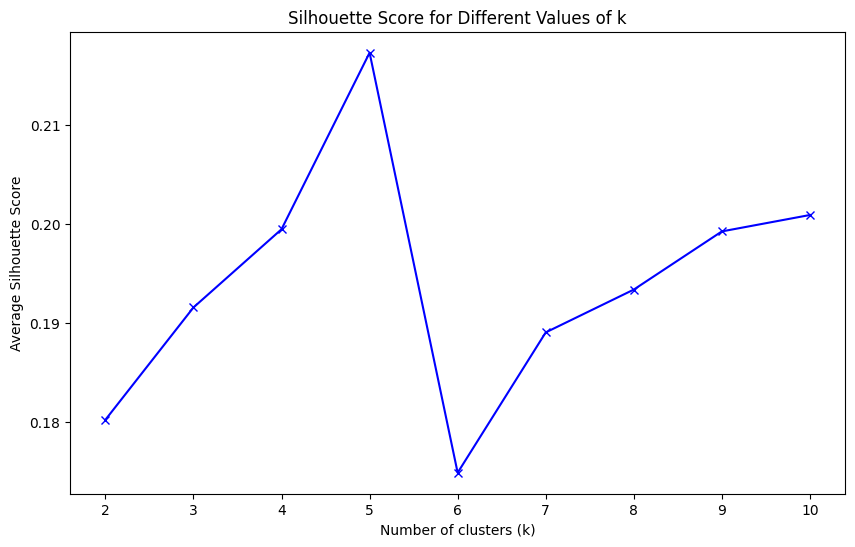

In [50]:
# perform k-means clustering on the features Per-Capita EUI, Area per Occupant, Consumption Volatility, Seasonal Ratio, and Weekend-Weekday Ratio (make sure you dont repeat using the same house ID again, so use drop duplicates on the house ID column first)
#first check the ideal number of clusters using the silhoutte score, print it too
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score                        
from sklearn.preprocessing import StandardScaler
features = ['Per-Capita EUI', 'Area per Occupant', 'Consumption Volatility', 'Seasonal Ratio', 'Weekend-Weekday Ratio']
df_unique = df_merged.drop_duplicates(subset=['household_id'])
X = df_unique[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

So we use number of clusters = 5


Primary Choice: GMM (Gaussian Mixture Models)

Why? The low K-Means scores suggest that clusters are not perfectly round and are likely overlapping. GMM is the perfect upgrade because it can model elliptical (stretched/rotated) clusters. It also provides "soft clustering," meaning it calculates the probability of each household belonging to each persona, which is a much richer and more realistic output.


Secondary Choice: DBSCAN

Why? Use this for a completely different perspective. Instead of forcing every household into a cluster, DBSCAN identifies dense regions of similar households. Its greatest strength is identifying outliers—those truly unique households that don't fit any persona. This could be invaluable for finding extreme energy users or anomalies.

For n_components = 2, BIC: 1456.9758803146196, AIC: 1342.6887188605558
For n_components = 3, BIC: 1420.7330942943402, AIC: 1247.9086062418532
For n_components = 4, BIC: 1465.3655223509575, AIC: 1234.0037077000477
For n_components = 5, BIC: 1478.3069420812678, AIC: 1188.407800831935
For n_components = 6, BIC: 1537.3235923072311, AIC: 1188.8871244594757
For n_components = 7, BIC: 1590.93131218579, AIC: 1183.9575177396111
For n_components = 8, BIC: 1603.959910500566, AIC: 1138.4487894559643
For n_components = 9, BIC: 1628.5234596164773, AIC: 1104.4750119734526
For n_components = 10, BIC: 1617.250464327507, AIC: 1034.6646900860594


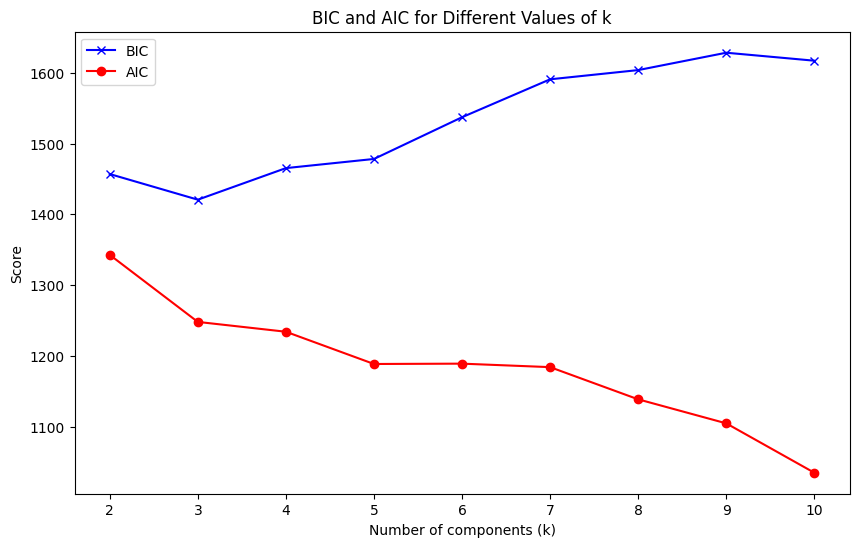

In [51]:
 #information criteria like the Bayesian Information Criterion (BIC) and the Akaike Information Criterion (AIC).
# Use Gaussian Mixture Models for this
from sklearn.mixture import GaussianMixture
bic_scores = []
aic_scores = []
K = range(2, 11)
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    print(f"For n_components = {k}, BIC: {bic_scores[-1]}, AIC: {aic_scores[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(K, bic_scores, 'bx-', label='BIC')
plt.plot(K, aic_scores, 'ro-', label='AIC')
plt.xlabel('Number of components (k)')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Values of k')
plt.legend()
plt.show()

In [52]:
#perform GMM usign n_compnents=3
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)
df_unique['Cluster'] = labels
df_unique.head()

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\67681136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Cluster'] = labels


,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Micro-wave,EUI,Per-Capita EUI,Area per Occupant,Day of Week,Month,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio,Cluster
0,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-22,1.039917,H002,Pune city,5.0,...,1,0.000945,0.000236,275.0,6,12,6.680022,1.220435,1.017973,2
190,Aurangabad,Basic,H114,Mainline,D0213,2019-07-06,3.300000,H114,Aurangabad,2.0,...,0,0.007333,0.001467,90.0,5,7,0.900308,1.061806,1.079234,0
424,Aurangabad,Basic,H118,Mainline,D0220,2020-02-12,19.900000,H118,Aurangabad,3.0,...,0,0.033167,0.004146,75.0,2,2,9.332850,0.936015,1.050023,2
563,Aurangabad,Basic,H119,Mainline,D0222,2019-06-13,0.600000,H119,Aurangabad,5.0,...,0,0.001333,0.000074,25.0,3,6,1.368097,2.680517,1.079085,1
658,Aurangabad,Basic,H122,Mainline,D0227,2019-12-22,6.600000,H122,Aurangabad,5.0,...,0,0.011000,0.001833,100.0,6,12,3.517208,1.275679,1.026159,0


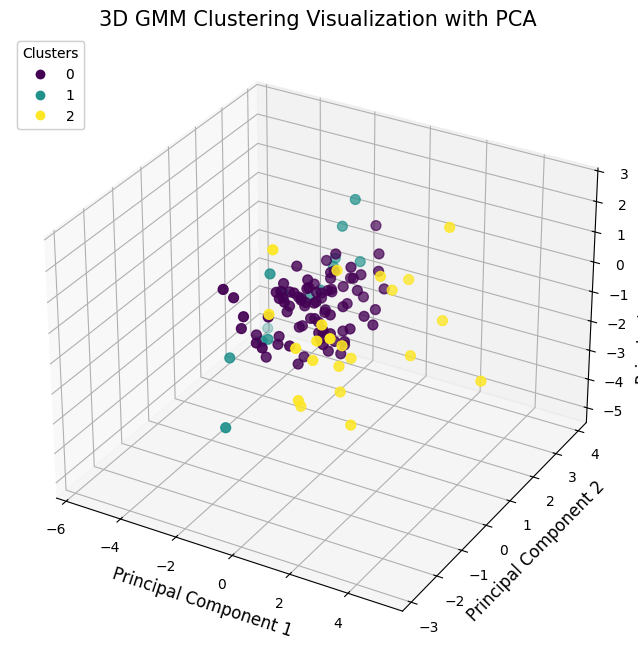

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
                     c=df_pca['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D GMM Clustering Visualization with PCA', fontsize=15)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)
plt.show()

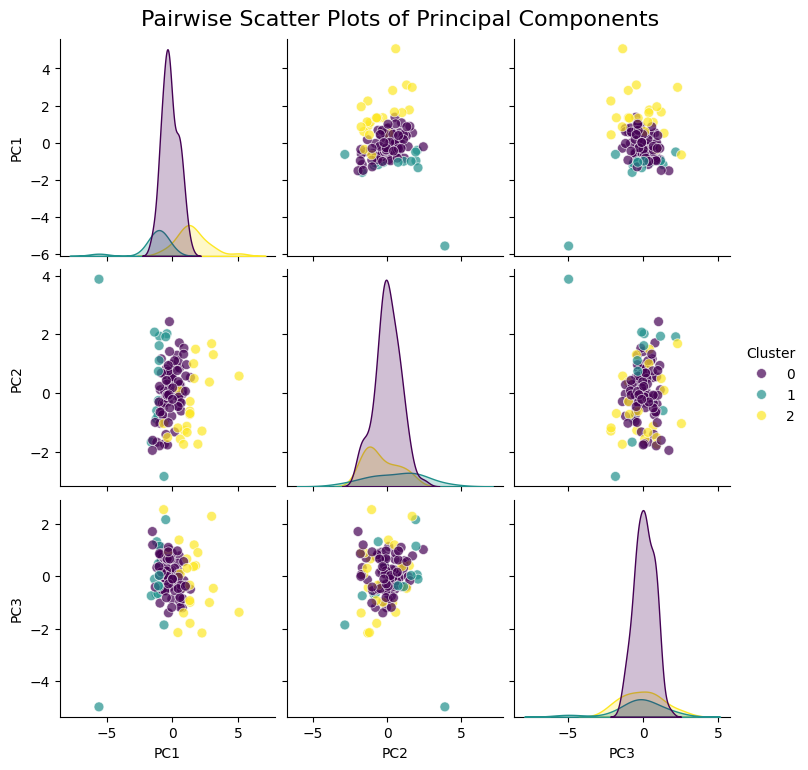

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_pca, hue='Cluster', vars=['PC1', 'PC2', 'PC3'], palette='viridis', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Pairwise Scatter Plots of Principal Components', y=1.02, fontsize=16)
plt.show()

# Analysis

In [55]:
df_cluster_0 = df_unique[df_unique['Cluster'] == 0].copy()
df_cluster_1 = df_unique[df_unique['Cluster'] == 1].copy()
df_cluster_2 = df_unique[df_unique['Cluster'] == 2].copy()